# OKCupid Date-A-Scientist Portfolio Project

## Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.
The analysis will be split in 2 parts:

1) __Supervised Learning__: using some of the data as features, several ML approaches will be used to predict another feature, used as a target label.

2) __Unsupervised Learning__: the main goal of dating apps is to match people. So I will use an unsupervised ML approach to find clusters of users that could match starting from their own data.


## Step 1: EDA and Feature Engineering

First task is always to look at the data we have, understand them and rearrange them in order to have the correct input format for a Machine Learning algorithm.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('profiles.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

From `.info()` method we learn that:

1) We have 59946 rows (i.e: 59946 OKCupid profiles)\
2) We have 31 features, the majority of which is a string (possibly categorical variables)\
3) There are only 3 numerical features: `age`, `height` and `income`\
4) Most of the features have several NaNs (only 7 features have no NaNs)

We can see also that there are 10 `essay` features. Looking on [kaggle](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles/discussion/183145), we understand that those essays are open answers to the follwing questions:

essay0- My self summary\
essay1- What I’m doing with my life\
essay2- I’m really good at\
essay3- The first thing people usually notice about me\
essay4- Favorite books, movies, show, music, and food\
essay5- The six things I could never do without\
essay6- I spend a lot of time thinking about\
essay7- On a typical Friday night I am\
essay8- The most private thing I am willing to admit\
essay9- You should message me if...

Being `essay` columns open text, they could be input to a Naive Bayes Classifier.

It could be helpful to gather all the information from all 10 essays into one big essay, and use it to try to predict some other feature. 

__DA SISTEMARE__ Nevertheless, considering our goal of finding clusters of possible matches using Unsupervised Learning Algorithms, those features could be difficult to handle; thus, for now we are going to exclude them. Let's create a DataFrame `X` dropping all the essay features.

In [30]:
X = df.drop(columns = list(df.filter(regex = 'essay')), axis = 1)

Let's look now each individual feature, in order to understand whether we can give it as input to our Machine Learning Algorithm. We start with a `.describe()` summary:

In [31]:
X.describe(include='all')

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54266,59943.000000,59946.000000,51748,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,217,NaN,NaN,21,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,white,NaN,NaN,other,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,32831,NaN,NaN,7589,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,20033.222534,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,97346.192104,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Numerical Variables

From this summary, we can already see something strange:

1) Max `age` is 110. Even though not impossible, it sounds very odd that a 110-years-old person uses a dating app. Furthermore, being the median of 30-years-old and the 75th percentile of 37-years-old, it will be very hard to match.

2) Min `height` is 1. That's obviously an outlier.

3) It seems that a lot of people has `income` of -1, being this value not only the median, but also the 3rd quartile. That is probably not an outlier nor a mistake, but a way to assess that income is not a crucial feature (or, in case of students, that they don't have any income).

Let's clean those issues starting with age:

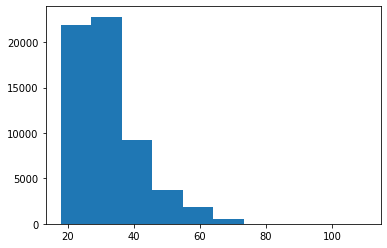

263
2


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,67.0,-1,NaN,...,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,95.0,-1,student,...,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


In [32]:
plt.hist(X['age'])
plt.show()

print(len(X[X.age>65]))
print(len(X[X.age>70]))
X[X.age>70]

We have 263 profiles with `age`>65, but only 2 with `age`>70, and those two have values of 110 and 109, obviously outliers. Let's remove them.

In [33]:
X = X[X.age < 80]

We exclude also every profile with a `height` lower than 45 inches and higher than 90 inches, which are very much likely outliers as well

In [34]:
X = X[(X.height>=45)&(X.height<90)]

People with income = -1: 48407
People with income > -1: 11483
People with income between 300000 and 900000$: 48
People with income higher than 500000$: 510


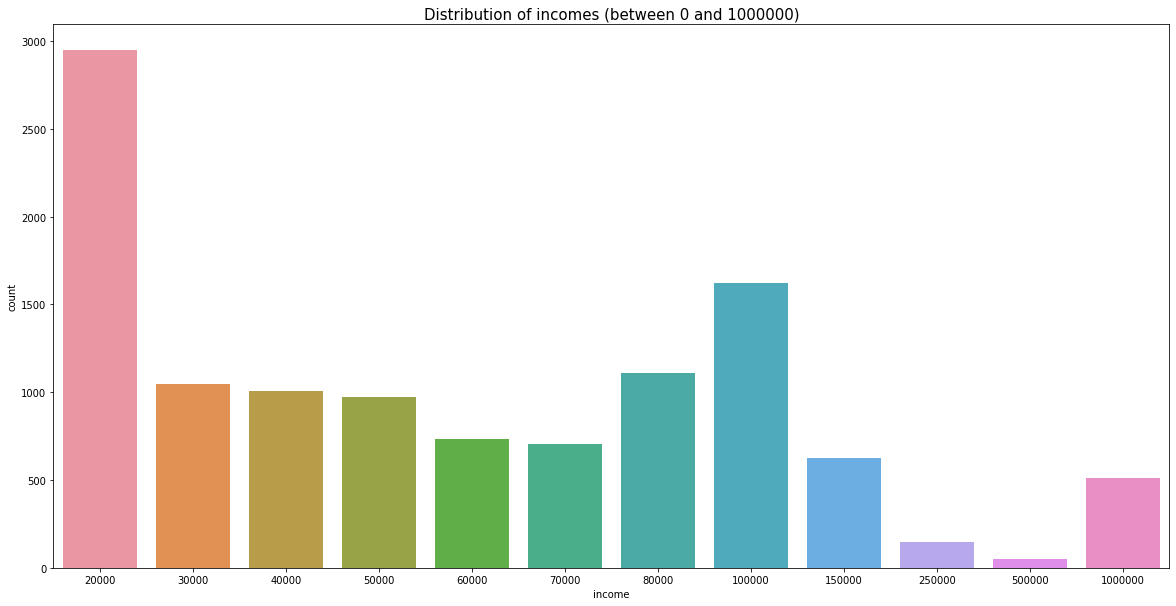

In [35]:
print("People with income = -1: " + str(len(X[X.income==-1])))
print("People with income > -1: " + str(len(X[X.income>0])))
print("People with income between 300000 and 900000$: " + str(len(X[(X.income>=300000)&(X.income<=900000)])))
print("People with income higher than 500000$: " + str(len(X[X.income>500000])))

#plt.hist(X.income)
plt.figure(figsize=(20,10))
sns.countplot(x=X[X.income>0].income)
plt.title("Distribution of incomes (between 0 and 1000000)", fontdict={'fontsize': 15})
plt.show()

We have the highest majority of people (almost 81%) with `income` value of -1, meaning that they do not care about the income.
Furthermore, there are around 500 people declaring an income of 1000000, which seems as well a declaration of not caring.
Anyway, let's keep the values as they are and see whether they can be useful in a Machine Learning Algorithm.

Apart from these values, the distribution of incomes seems bimodal, with the highest peak at 20000 and another local maximum at 100000.

### Categorical variables

Let's now encode the Categorical variables which have 0 NaNs.

1) __SEX__: only 2 values, *m* and *f*

In [36]:
sex_dict = {'m':0, 'f':1}
print(X.sex.value_counts())
X['sex'] = X.sex.map(sex_dict)
print(X.sex.value_counts())

m    35792
f    24098
Name: sex, dtype: int64
0    35792
1    24098
Name: sex, dtype: int64


2) __ORIENTATION__: there are 3 values: *straight*, *gay* and *bisex*. Since *bisex* is matchable with both *straight* and *gay*, this variable can be splitted in 2 dummy variables, __*straight_comp*__ and __*gay_comp*__, which are regulated by the following look-up table:


| Orientation | straight_comp | gay_comp |
|-------------|:-------------:|---------:|
| straight    |       1       |    0     |
| gay         |       0       |    1     |
| bisex       |       1       |    1     |

In [37]:
X['straight_comp'] = X['orientation'].apply(lambda x: 1 if (x=='straight')|(x=='bisexual') else 0)
X['gay_comp'] = X['orientation'].apply(lambda x: 1 if (x=='gay')|(x=='bisexual') else 0)

3) __LOCATION__: Location feature has the structure "city, state". First of all, we split *city* and *state* in two separate columns. Then, we clean a little bit the *city* column (for instance, the value "south san francisco" can be converted in "san francisco", in order to reduce the number of unique values without losing much information)

In [38]:
location_temp = X.location.str.split(pat=',',expand=True)
X['state'] = location_temp[1]
X['state'] = X.state.replace(to_replace=' ', value='', regex=True)
X['city'] = location_temp[0]
X['city'] = X.city.replace(to_replace='^north ',value='',regex=True)
X['city'] = X.city.replace(to_replace='^south ',value='',regex=True)
X['city'] = X.city.replace(to_replace='^east ',value='',regex=True)
X['city'] = X.city.replace(to_replace='^west ',value='',regex=True)
print(X.state.value_counts())

california            59800
newyork                  17
illinois                  8
massachusetts             5
texas                     4
oregon                    4
michigan                  4
arizona                   3
florida                   3
districtofcolumbia        2
washington                2
utah                      2
georgia                   2
minnesota                 2
colorado                  2
unitedkingdom             2
ohio                      2
spain                     2
virginia                  2
hawaii                    2
louisiana                 1
tennessee                 1
switzerland               1
netherlands               1
pennsylvania              1
germany                   1
missouri                  1
britishcolumbia           1
rhodeisland               1
westvirginia              1
connecticut               1
ireland                   1
montana                   1
wisconsin                 1
nevada                    1
newjersey           

Since almost everyone is from California, we keep only people from California (and then this feature can be dropped)

In [39]:
X = X[X.state == 'california']

59800


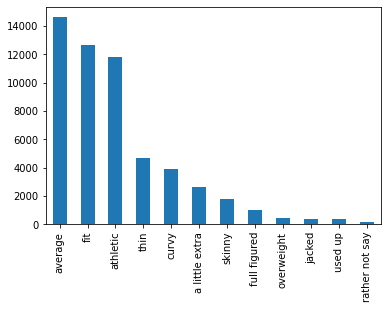

In [46]:
X.body_type.unique()
X.body_type.value_counts().plot(kind='bar')
plt.show()

In [17]:
df.education.isna().value_counts()

False    53318
True      6628
Name: education, dtype: int64

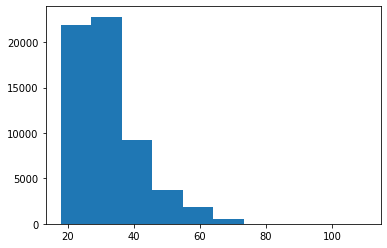

In [18]:
plt.hist(df.age)
plt.show()

In [21]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

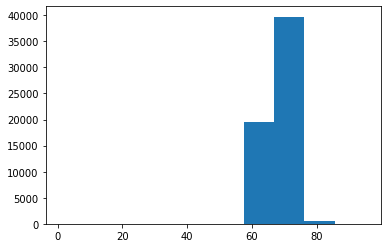

70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      20
57.0      17
83.0      12
81.0      11
82.0      11
36.0      11
84.0       9
56.0       8
55.0       6
53.0       5
94.0       3
54.0       3
91.0       3
50.0       2
88.0       2
37.0       2
48.0       2
43.0       2
1.0        1
51.0       1
90.0       1
26.0       1
85.0       1
9.0        1
89.0       1
92.0       1
87.0       1
49.0       1
47.0       1
6.0        1
42.0       1
86.0       1
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: height, dtype: int64

In [20]:
plt.hist(df.height)
plt.show()
df.height.value_counts()

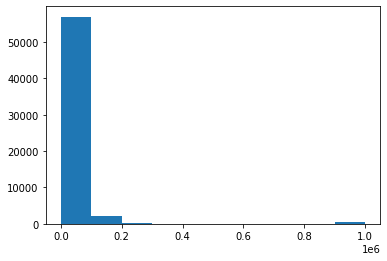

In [22]:
plt.hist(df.income)
plt.show()

In [23]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [40]:
df['ethnicity'].describe()
pd.set_option("display.max_rows", None)
df['ethnicity'].value_counts()

white                                                                                                      32831
asian                                                                                                       6134
hispanic / latin                                                                                            2823
black                                                                                                       2008
other                                                                                                       1706
hispanic / latin, white                                                                                     1301
indian                                                                                                      1077
asian, white                                                                                                 811
white, other                                                                                    

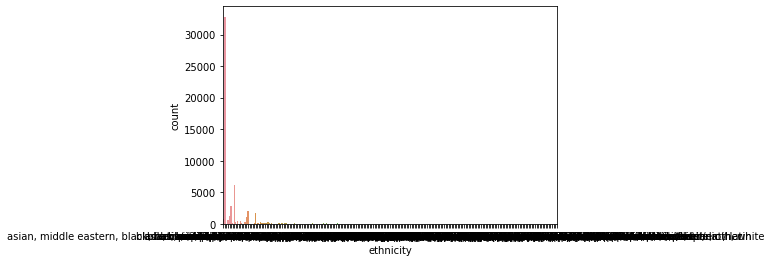

In [38]:
sns.countplot(x=df['ethnicity'])
plt.show()

In [25]:
print(df.ethnicity.unique())

['asian, white' 'white' nan 'asian, black, other' 'white, other'
 'hispanic / latin, white' 'hispanic / latin' 'pacific islander, white'
 'asian' 'black, white' 'pacific islander' 'asian, native american'
 'asian, pacific islander' 'black, native american, white'
 'middle eastern, other' 'native american, white' 'indian' 'black'
 'black, native american, hispanic / latin, other'
 'black, native american, hispanic / latin'
 'asian, black, pacific islander'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'other' 'hispanic / latin, other' 'asian, black' 'middle eastern, white'
 'native american, white, other' 'black, native american'
 'black, white, other' 'hispanic / latin, white, other' 'middle eastern'
 'black, other' 'native american, hispanic / latin, white' 'black, indian'
 'indian, white, other' 'middle eastern, indian, other'
 'black, native american, hispanic / latin, white, other'
 'pacific islander, hispanic / latin' '

In [26]:
df.last_online.value_counts()

2012-06-29-22-56    24
2012-06-30-21-51    23
2012-06-30-22-09    23
2012-06-30-22-56    23
2012-06-30-23-27    23
                    ..
2011-08-23-23-25     1
2011-11-14-20-18     1
2012-05-07-18-14     1
2012-05-31-19-01     1
2012-06-14-16-51     1
Name: last_online, Length: 30123, dtype: int64

In [27]:
df.orientation.value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [ ]:
print(sorted(df.location.unique()))

In [28]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [14]:
df.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [16]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [45]:
df.religion.value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab